# Classification Models Practice

Here are some resources to look for a dataset if you want to practice classification algorithms.

- [Kaggle](https://kaggle.com) 
- [Data World](https://data.world/datasets/data)
- [Google Dataset Search](https://datasetsearch.research.google.com/)

Today, we will look into how to approach classification problems and come up with a business problem. We will also look into 
- building a baseline model, 
- improving its performance using hyperparameter tuning
- providing some insights into the model if possible

# Dataset: Pima Indians Diabetes

We will be using a toy dataset for today's guided practice. A toy dataset is a small standard dataset that is generally used for benchmarking algorithms or just getting everything set up quickly. Here is a [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to the dataset page. Since this dataset is a very simple dataset, we will not have many problems we usually need to deal with here and this dataset requires very minimal preprocessing

**Attribute Information:**

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1)

# Business case

The business problem here can be a governmental health agency trying to understand the leading causes of diabetes and trying to decide potential advertisements for educating the public and raise awareness. It could also be about predicting which groups of population might be at risk of diabetes and ensuring good preventive measures are instituted as soon as possible

## Define true positives, false positives, true negatives and false negatives

True positive: classify that a sample has diabetes and the underlying truth is the sample does indeed have diabetes 

False positive: classify that a sample has diabetes and the underlying truth is the sample does not have diabetes

True negative: classify that a sample does not have diabetes and the underlying truth is the sample does not have diabetes

False negative: classify that a sample does not have diabetes and the underlying truth is the sample does have diabetes

## Question - Comment on the metric you think will be most valuable to look at 

Both false positive and false negative cases seem like they would have a detrimental impact to the patient. The metric that would be most valuable to look at would be the F1 score because it takes into account both precision and recall.

# Code 

The code is included below this point. Here are the steps we will follow
- Import libraries and data
- Basic EDA
- Baseline Model
- Hyperparameter Tuning
- Building a pipeline

## Imports 

In [1]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix

In [2]:
data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Quick observations:

1. All datatypes look good for modeling ie no object
2. No missing values
3. Target variable is outcome

In [3]:
#display first 5 rows of df
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check class imbalance
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#get a quick idea about the data -> summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1]:
# comment about the class imbalance, will it affect the results and do we need
# to do anything about it
# There is a class imbalance in the dataset in favor of the outcome 0. It is not super heavily skewed though
# so we can proceed without using any undersampling/oversampling techniques

## EDA

In [15]:
#do 3 EDA plots
# 0 = non-diabetic, 1 = diabetic

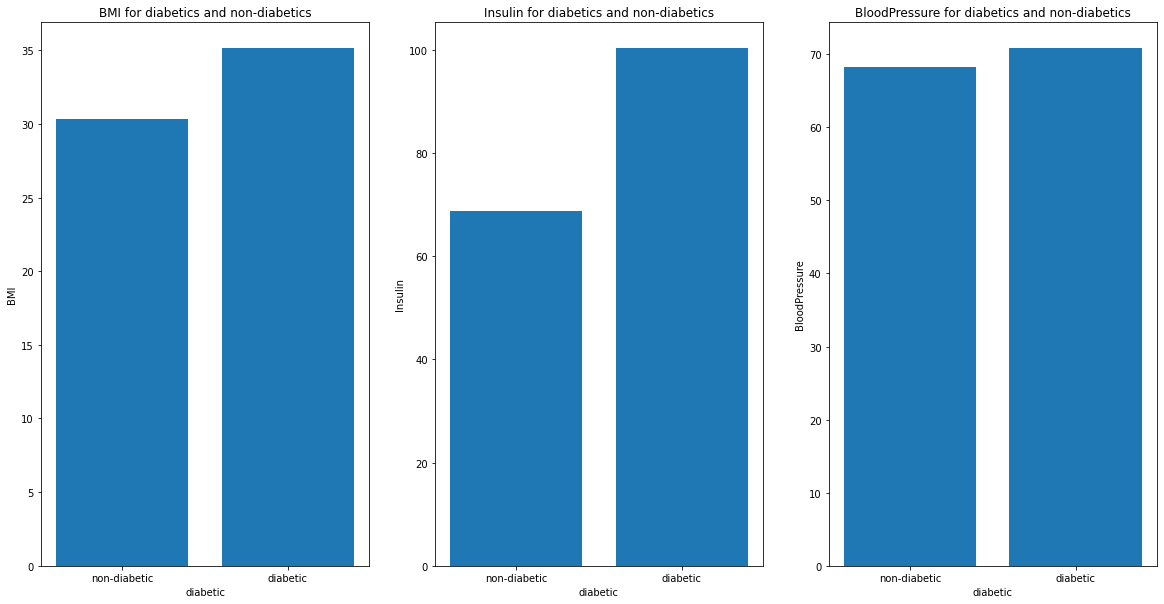

In [19]:
# Average blood pressure for diabetics 
fig, axs = plt.subplots(1,3, figsize = (20,10))
grouped = data.groupby('Outcome').mean()
for i, val in enumerate(['BMI', 'Insulin', 'BloodPressure']):
    axs[i].bar(grouped.reset_index()['Outcome'], grouped[val], tick_label=['non-diabetic', 'diabetic'])
    axs[i].set_xlabel('diabetic')
    axs[i].set_ylabel(val)
    axs[i].set_title(f'{val} for diabetics and non-diabetics')

## Logistic Regression Model

In [20]:
#do a test train split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=2)

In [21]:
#build a baseline model 
lr = LogisticRegression(fit_intercept = False)
lr.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [22]:
#get predicitions from baseline
y_pred = lr.predict(X_test)

In [25]:
#build a confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[91 18]
 [30 15]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       109
           1       0.45      0.33      0.38        45

    accuracy                           0.69       154
   macro avg       0.60      0.58      0.59       154
weighted avg       0.67      0.69      0.67       154



# Decision Tree Model

In [26]:
#define a decision tree
dt = DecisionTreeClassifier()

In [27]:
#fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
#get predictions from the model
y_pred_dt = dt.predict(X_test)

In [32]:
# prediction from training 
y_pred_train = dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
cr = classification_report(y_train, y_pred_train)
print(cr)

[[391   0]
 [  0 223]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       223

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [29]:
#print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
cr = classification_report(y_test, y_pred_dt)
print(cr)

[[85 24]
 [19 26]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.52      0.58      0.55        45

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154



In [30]:
#comment about the fit of the model
# The decision tree did a better job at classifying diabetics than the logistic regression model 
# Based on the precision and recall metrics, the decision tree would be the best option
# After looking at the performance on the training set, this model overfits 

## Pruning the decision tree

In [41]:
#prune the decision tree using the max_depth
max_depth = 9
dt_max = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
dt_max.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [42]:
#get predicitions from the pruned model
y_pred_max = dt_max.predict(X_test)

In [43]:
#print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_max)
print(cm)
cr = classification_report(y_test, y_pred_max)
print(cr)

[[88 21]
 [22 23]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       109
           1       0.52      0.51      0.52        45

    accuracy                           0.72       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.72      0.72      0.72       154



In [45]:
#comment about the fit of the model
# After pruning, we found that there wasnt a major change between the metrics of pruned vs unpruned
# In the future, more comprehensive preprocessing couldve been done and a grid search for pruning options